One vs All (OvA) o One vs Rest (OvR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_digits            #carico un dataset di immagini scritte a mano
digits = load_digits()

X = digits.data
Y = digits.target
X.shape                             #ogni proprietà è un pixel dell'immagine
np.unique(Y)                        #9 classi 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

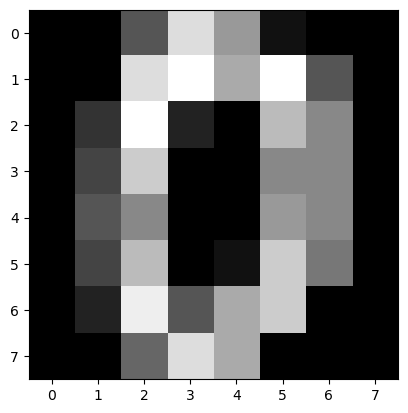

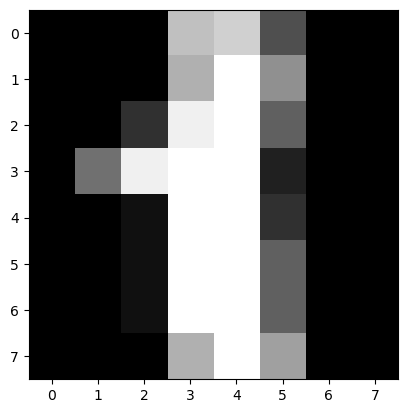

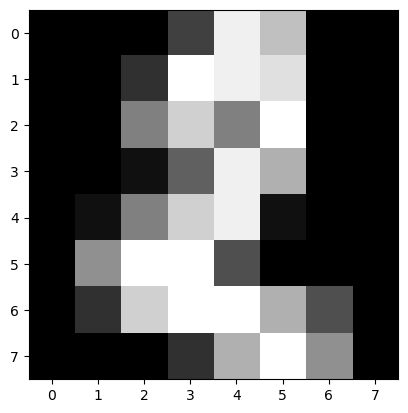

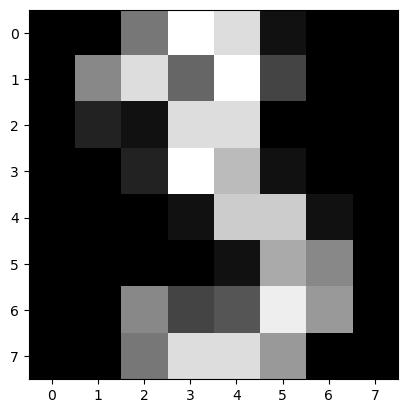

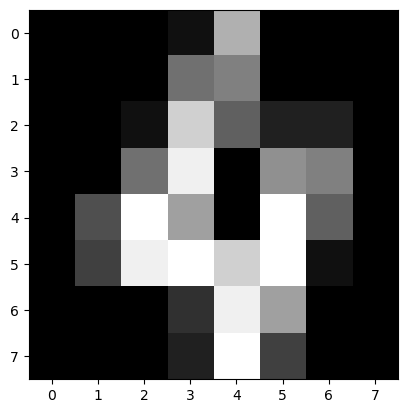

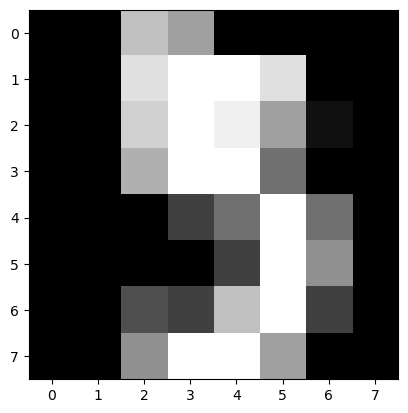

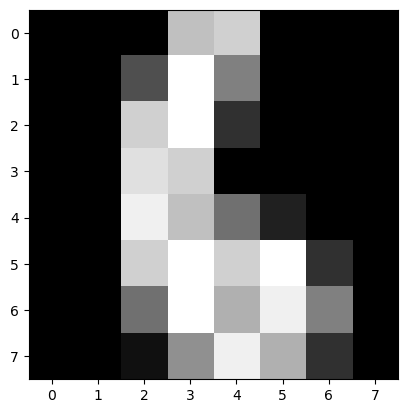

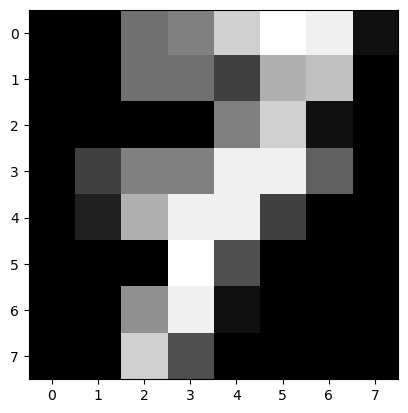

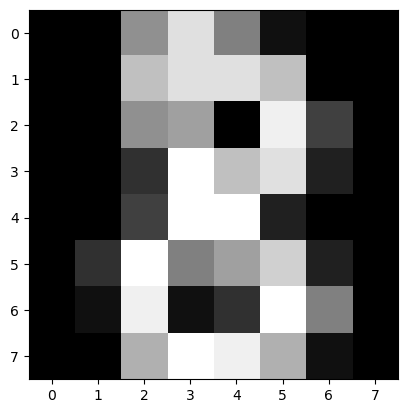

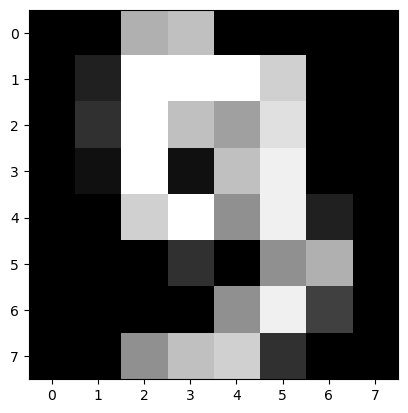

In [4]:
#Il set di addestramento contiene 1257 esempi, le immagini sono in grayscale in formato 8x8 pixel, quindi avremo un totale di 64 proprietà, una per ogni pixel.
#Proviamo a visualizzare un esempio di immagine per ogni classe, possiamo utilizzare la funzione imshow di matplotlib, 
#la quale è in grado di mostrare un immagine da una matrice di valori.
for i in range(0,10):
    pic_matrix = X[Y==i][0].reshape([8,8])
    plt.imshow(pic_matrix, cmap="grey")
    plt.show()

In [5]:
#creo i set per addestramento e test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#conviene normalizzare le colonne per riportarlo in un range tra 0 e 1 e non tra 0 e 255
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [6]:
#eseguo la regressione logistica per il problema di classificazione multiclasse
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
Y_pred_prob = lr.predict_proba(X_test)
print("ACCURACY= " +str(accuracy_score(Y_pred, Y_test)))
print("LOG LOSS= " +str(log_loss(Y_test, Y_pred_prob)))

ACCURACY= 0.9611111111111111
LOG LOSS= 0.17742767355193334


Matrice di confusione come parametro per la classificazione

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  2, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 51,  0,  0],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 57,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]])

Text(0.5, 137.22222222222217, 'Classe predetta')

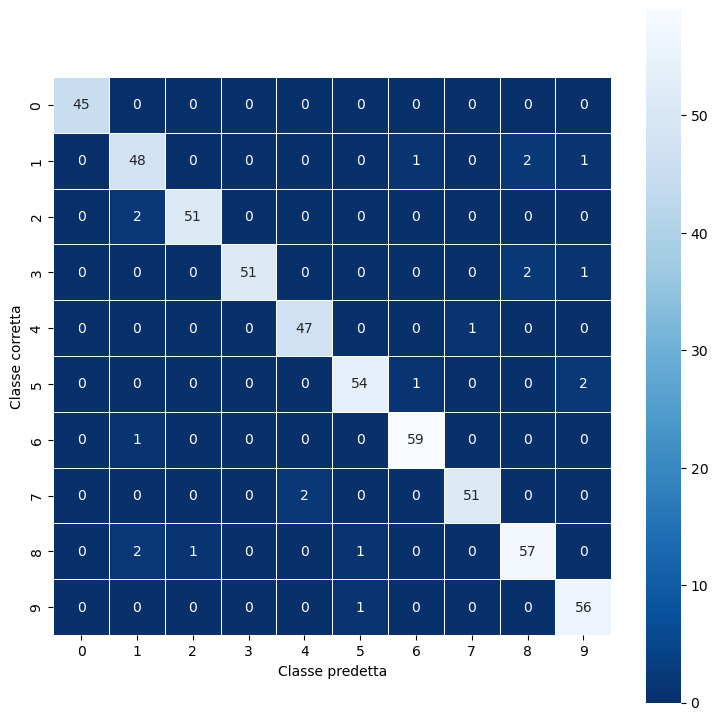

In [12]:
#la visualizzo meglio con seaborn e matplotlib
import seaborn as sns
plt.figure(figsize=(9,9))               #creo un immagine di dimesione 9x9
sns.heatmap(cm, annot=True, cmap="Blues_r", linewidths=.5, square=True)
plt.ylabel('Classe corretta')
plt.xlabel('Classe predetta')

In [14]:
#Avrei potuto utilizzare direttamente un modello di sckitlearn per il problema di classificazione multiclasse
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(LogisticRegression())
ovr.fit(X_train, Y_train)

Y_pred = ovr.predict(X_test)
Y_pred_prob = ovr.predict_proba(X_test)
print("ACCURACY= " +str(accuracy_score(Y_pred, Y_test)))
print("LOG LOSS= " +str(log_loss(Y_test, Y_pred_prob)))

ACCURACY= 0.9555555555555556
LOG LOSS= 0.22880423406703818


array([ 0. ,  2.5,  5. ,  7.5, 10. ])